In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

import numpy as np

import seaborn as sns

height has been deprecated.



In [10]:
fb = pd.read_table('dataset_Facebook.csv', sep=',')
fb.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


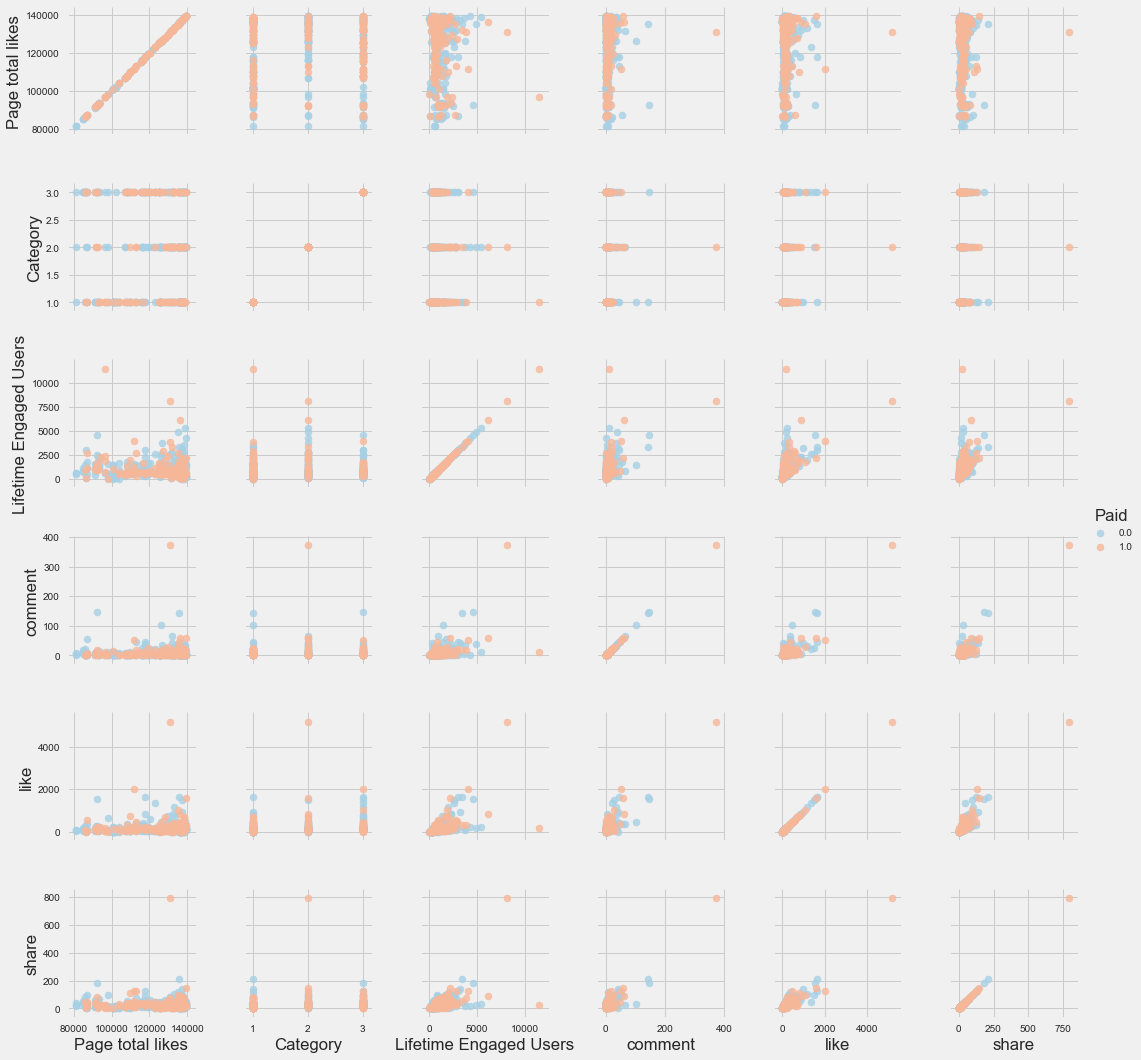

In [15]:
g = sns.PairGrid(fb, 
             vars=['Page total likes', 'Category', 'Lifetime Engaged Users', 'comment', 'like', 'share'],
             hue='Paid', palette='RdBu_r'         
            )

g.map(plt.scatter, alpha=0.8)

g.add_legend()

In [36]:
#let's look at the likes, and specifically at the distribution
likes = fb['Page total likes']
likes.describe()

count       500.000000
mean     123194.176000
std       16272.813214
min       81370.000000
25%      112676.000000
50%      129600.000000
75%      136393.000000
max      139441.000000
Name: Page total likes, dtype: float64

C:\Users\brent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


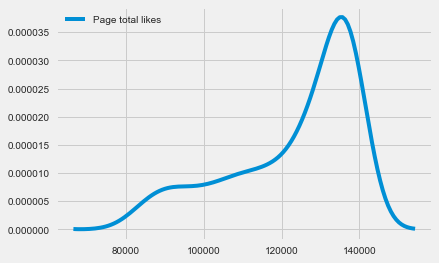

In [37]:
#likes is skewed to the left and centered around 13,500 or so
sns.kdeplot(likes)

C:\Users\brent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


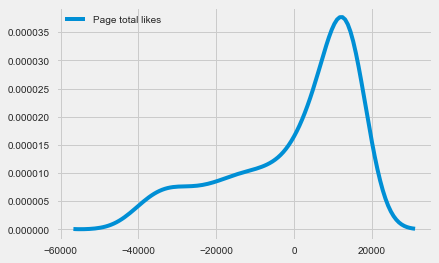

In [38]:
#lets subtract the mean from the data
likes_new = likes-likes.mean()

#we can visualize the distribution and see that it shifted to the left and is now centered around 0
sns.kdeplot(likes_new)

In [41]:
#let's divide by the standard deviation, this scales the data and gives "unit variance"
likes_new_std = likes_new/likes.std()

C:\Users\brent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


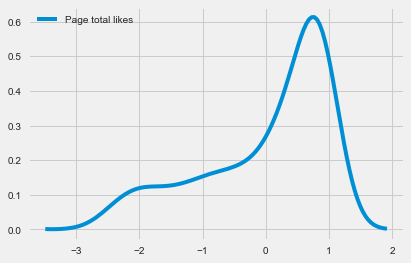

In [40]:
#view the new "ZERO MEAN AND UNIT VARIANCE" scaled data
sns.kdeplot(likes_new_std)

In [43]:
#sklearn has an easier method for doing this exact same thing
from sklearn import preprocessing

In [45]:
#just use the preprocessing.scale method
likes_scaled = preprocessing.scale(likes)

C:\Users\brent\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


C:\Users\brent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


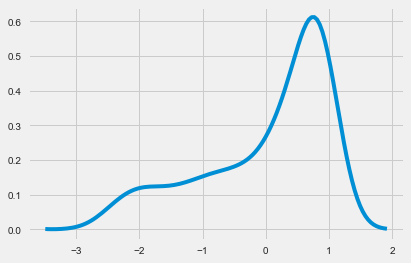

In [46]:
#we can see it did the same thing that we did above
sns.kdeplot(likes_scaled)